### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in Data from the VROD excel- Run only once for creating the Project csv

In [2]:
# Path to your Excel file
excel_file_path = '../data/VROD_v11_latest.xlsx'

# Name of the sheet you want to export
sheet_name = 'PROJECTS' 

# Read the specific sheet
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header = None)

df.columns = df.iloc[3] 
# # Remove the first two rows
df = df.iloc[4:]
df.reset_index(drop=True, inplace=True)
# # Export the DataFrame to CSV
csv_file_path = '../data/PROJECTS_V11.csv'
df.to_csv(csv_file_path, index=False)

In [3]:
##Starting from below after the first checkpoint

In [4]:
projects_df = pd.read_csv("../data/PROJECTS_V11.csv")

C:\Users\hnkev\AppData\Local\Temp\ipykernel_2980\117585229.py:1: DtypeWarning: Columns (12,109,110,111,113,114,117,118,119,120,125,155) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_df = pd.read_csv("../data/PROJECTS_V11.csv")


In [5]:
projects_df.shape

(9092, 161)

In [6]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Columns: 161 entries, Project ID to Unnamed: 160
dtypes: float64(127), object(34)
memory usage: 11.2+ MB


## Explore Data

In [7]:
projects_df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WA\nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Country,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project (Vintage),1996,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,1996.1,1997.0.1,1998.0.1,1999.0.1,2000.0.1,2001.0.1,2002.0.1,2003.0.1,2004.0.1,2005.0.1,2006.0.1,2007.0.1,2008.0.1,2009.0.1,2010.0.1,2011.0.1,2012.0.1,2013.0.1,2014.0.1,2015.0.1,2016.0.1,2017.0.1,2018.0.1,2019.0.1,2020.0.1,2021.0.1,2022.0.1,2023.0.1,2024.0.1,Year \nUnknown,1996.2,1997.0.2,1998.0.2,1999.0.2,2000.0.2,2001.0.2,2002.0.2,2003.0.2,2004.0.2,2005.0.2,2006.0.2,2007.0.2,2008.0.2,2009.0.2,2010.0.2,2011.0.2,2012.0.2,2013.0.2,2014.0.2,2015.0.2,2016.0.2,2017.0.2,2018.0.2,2019.0.2,2020.0.2,2021.0.2,2022.0.2,2023.0.2,2024.0.2,Project Owner,Offset Project Operator,Authorized Project Designee,Verifier,Estimated Annual Emission Reductions,PERs,Registry / ARB / WA,ARB Project Detail,ARB ID,PoA ID/Aggregate ID,CORSIA Eligible,Project Listed,Project Registered,CCB / Certifications,Project Type From the Registry,Registry \nDocuments,Project Website,1996.3,1997.0.3,1998.0.3,1999.0.3,2000.0.3,2001.0.3,2002.0.3,2003.0.3,2004.0.3,2005.0.3,2006.0.3,2007.0.3,2008.0.3,2009.0.3,2010.0.3,2011.0.3,2012.0.3,2013.0.3,2014.0.3,2015.0.3,2016.0.3,2017.0.3,2018.0.3,2019.0.3,2020.0.3,2021.0.3,2022.0.3,2023.0.3,2024.0.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Added to Database Version - With Data Through,Unnamed: 158,"1st issuance yr (no hard code, hide)",Unnamed: 160
0,ACR1002,Doyon Ts'oo,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,ALASKA,Southeast and Northwest Interior Alaska,"Doyon, Limited",0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.doyon.com/about/sustainability/carbon-fore...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0.0,1.0
1,ACR1006,Challenge Tree Farm IFM Project,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,CALIFORNIA,Yuba and Butte County,1169,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0.0,1.0
2,ACR1007,A-Gas 3-2023B,ACR,No,NaN,Chemical Processes,Ozone Depleting Substances Recovery & Destruction,Reduction,ARB Compliance Offset Protocol: Destruction of...,North America,United States,OHIO,Bowling Green,A-Gas US Inc.,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Data Cleanup and Preprocessing

In [8]:
# Cleaning up the Feature names to remove newline char, trim spaces, add lowercase and and replace "/" and " " by "or" and "_"
cleaned_column_names = projects_df.columns.str.strip().str.lower().str.replace('\n', '').str.replace('/', 'or').str.replace(' ', '_').str.replace('__', '_')

In [9]:
# Apply the cleaned column names to the DataFrame
projects_df.columns = cleaned_column_names

In [10]:
# Identify columns that match the pattern of years using regex
columns_to_drop = projects_df.columns[projects_df.columns.str.match(r'^\d{4}')]

In [11]:
# Dropping the specified columns
projects_df.drop(columns=columns_to_drop, inplace=True)

In [12]:
null_counts = projects_df.isnull().sum()
null_counts

project_id                                          3
project_name                                        4
voluntary_registry                                  3
arborwaproject                                      3
voluntary_status                                  326
scope                                               3
type                                                3
reduction_or_removal                                2
methodology_or_protocol                           274
region                                              3
country                                             3
state                                            7410
project_site_location                            7448
project_developer                                   4
total_credits_issued                                3
total_credits_retired                               3
total_credits_remaining                             3
total_buffer_pool_deposits                          3
reversals_covered_by_buffer_

In [13]:
#Remove the project with Null name
project=projects_df[(projects_df["project_name"].isna()) | (projects_df["project_developer"].isna())]

project

,project_id,project_name,voluntary_registry,arborwaproject,voluntary_status,scope,type,reduction_or_removal,methodology_or_protocol,region,country,state,project_site_location,project_developer,total_credits_issued,total_credits_retired,total_credits_remaining,total_buffer_pool_deposits,reversals_covered_by_buffer_pool,reversals_not_covered_by_buffer,first_year_of_project_(vintage),year_unknown,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,pers,registry_or_arb_or_wa,arb_project_detail,arb_id,poa_idoraggregate_id,corsia_eligible,project_listed,project_registered,ccb_or_certifications,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_berkeley_carbon_trading_project,added_to_database_version_-_with_data_through,unnamed:_158,"1st_issuance_yr_(no_hard_code,_hide)",unnamed:_160
6065,VCS2240,NaN,VCS,No,Withdrawn,Renewable Energy,RE Bundled,Reduction,ACM0002,North America,United States,NaN,NaN,Southern Power Company,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,VCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy industries (renewable/non-renewable sou...,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,NaN,v 1 12-2020,NaN,0.0,1.0
6797,VCS3013,Andes Inorganic Carbon Capture on Agricultural...,VCS,No,Inactive,Agriculture,Carbon Mineralization,Long-Duration Removal,VM0021,North America,United States,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,137464688,NaN,VCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture Forestry and Other Land Use,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,,v11 03-2024,NaN,0.0,1.0
9089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Dropping the project with empty name
projects_df = projects_df.dropna(subset=['project_name','project_developer'])

In [15]:
Inactive_projects = projects_df[projects_df["voluntary_status"]== "Inactive"]
print(Inactive_projects.shape)
Inactive_projects.head()

(193, 45)


,project_id,project_name,voluntary_registry,arborwaproject,voluntary_status,scope,type,reduction_or_removal,methodology_or_protocol,region,country,state,project_site_location,project_developer,total_credits_issued,total_credits_retired,total_credits_remaining,total_buffer_pool_deposits,reversals_covered_by_buffer_pool,reversals_not_covered_by_buffer,first_year_of_project_(vintage),year_unknown,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,pers,registry_or_arb_or_wa,arb_project_detail,arb_id,poa_idoraggregate_id,corsia_eligible,project_listed,project_registered,ccb_or_certifications,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_berkeley_carbon_trading_project,added_to_database_version_-_with_data_through,unnamed:_158,"1st_issuance_yr_(no_hard_code,_hide)",unnamed:_160
9,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,Madagascar,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,NaN,v 1 12-2020,NaN,0.0,1.0
21,ACR116,Societe VERAMA Madagascar Afforestation Project,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,Madagascar,Antonibe,Masiloka Peninsula,Societe VERAMA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,NaN,v 1 12-2020,NaN,0.0,1.0
87,ACR186,Devil Fire Reforestation,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,Climate Action Reserve Forest Project Protocol,North America,United States,CALIFORNIA,Susanville,"W. M. Beaty & Associates, Inc.",0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,,NaN,v 1 12-2020,NaN,0.0,1.0
88,ACR187,Storrie Fire Reforestation,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,Climate Action Reserve Forest Project Protocol,North America,United States,CALIFORNIA,Chester,"W. M. Beaty & Associates, Inc.",0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,,NaN,v 1 12-2020,NaN,0.0,1.0
5313,VCS1329,Maísa REDD+ Project,VCS,No,Inactive,Forestry & Land Use,REDD+,Reduction,VM0015,Latin America and the Caribbean,Brazil,NaN,NaN,Multiple Proponents,634948.0,541774.0,93174.0,131600.0,NaN,NaN,2013.0,0.0,NaN,NaN,NaN,NaN,67458,NaN,VCS,NaN,NaN,NaN,NaN,NaN,2020-04-06 00:00:00,NaN,Agriculture Forestry and Other Land Use,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,NaN,v 1 12-2020,NaN,2013.0,1.0


In [16]:
grp_type_by_scope_inactive = Inactive_projects.groupby(['scope', 'type']).size().reset_index(name='Count')

# Display the grouped DataFrame
grp_type_by_scope_inactive

,scope,type,Count
0,Agriculture,Rice Emission Reductions,170
1,Forestry & Land Use,Afforestation/Reforestation,10
2,Forestry & Land Use,Improved Forest Management,1
3,Forestry & Land Use,REDD+,2
4,Forestry & Land Use,Wetland Restoration,1
5,Industrial & Commercial,Energy Efficiency,1
6,Renewable Energy,Solar - Centralized,1
7,Renewable Energy,Solar - Distributed,1
8,Renewable Energy,Wind,2
9,Waste Management,Composting,1


In [17]:
# Generate the value counts for the 'Scope' column
scope_counts = projects_df['scope'].value_counts()
scope_counts

scope
Household & Community       2566
Renewable Energy            2356
Forestry & Land Use         1652
Agriculture                  960
Waste Management             623
Chemical Processes           462
Industrial & Commercial      349
Transportation               107
Carbon Capture & Storage      12
Name: count, dtype: int64

In [18]:
# Generate the value counts for the 'Scope' column
type_counts = projects_df['type'].value_counts()
type_counts

type
Cookstoves                                           1434
Wind                                                 1014
Improved Forest Management                            757
Hydropower                                            529
Afforestation/Reforestation                           474
Manure Methane Digester                               449
Clean Water                                           412
Landfill Methane                                      382
Solar - Centralized                                   317
Rice Emission Reductions                              294
Ozone Depleting Substances Recovery & Destruction     292
Biomass                                               278
REDD+                                                 273
Community Boreholes                                   259
Biodigesters                                          243
Sustainable Agriculture                               165
Bundled Energy Efficiency                             156
Mine Meth

In [19]:
# Group by 'Project Scope' and 'Project Type', then count the occurrences
grp_type_by_scope = projects_df.groupby(['scope', 'type']).size().reset_index(name='Count')

# Display the grouped DataFrame
grp_type_by_scope

,scope,type,Count
0,Agriculture,Bundled Compost Production and Soil Application,2
1,Agriculture,Compost Addition to Rangeland,1
2,Agriculture,Feed Additives,12
3,Agriculture,Improved Irrigation Management,16
4,Agriculture,Improved irrigation management,1
5,Agriculture,Manure Methane Digester,449
6,Agriculture,Nitrogen Management,6
7,Agriculture,Rice Emission Reductions,294
8,Agriculture,Solid Waste Separation,14
9,Agriculture,Sustainable Agriculture,165


In [20]:
# Calculate value counts for 'type' column
type_counts = projects_df['type'].value_counts()

# Identify types with counts less than or equal to 50
types_to_group = type_counts[type_counts < 50].index
#print(types_to_group, len(types_to_group))

# Filter the DataFrame
other_type = projects_df[projects_df['type'].isin(types_to_group)]

print("Total Types :",len(types_to_group))
print("Shape of other_type dataframe:", other_type.shape)

Total Types : 53
Shape of other_type dataframe: (720, 45)


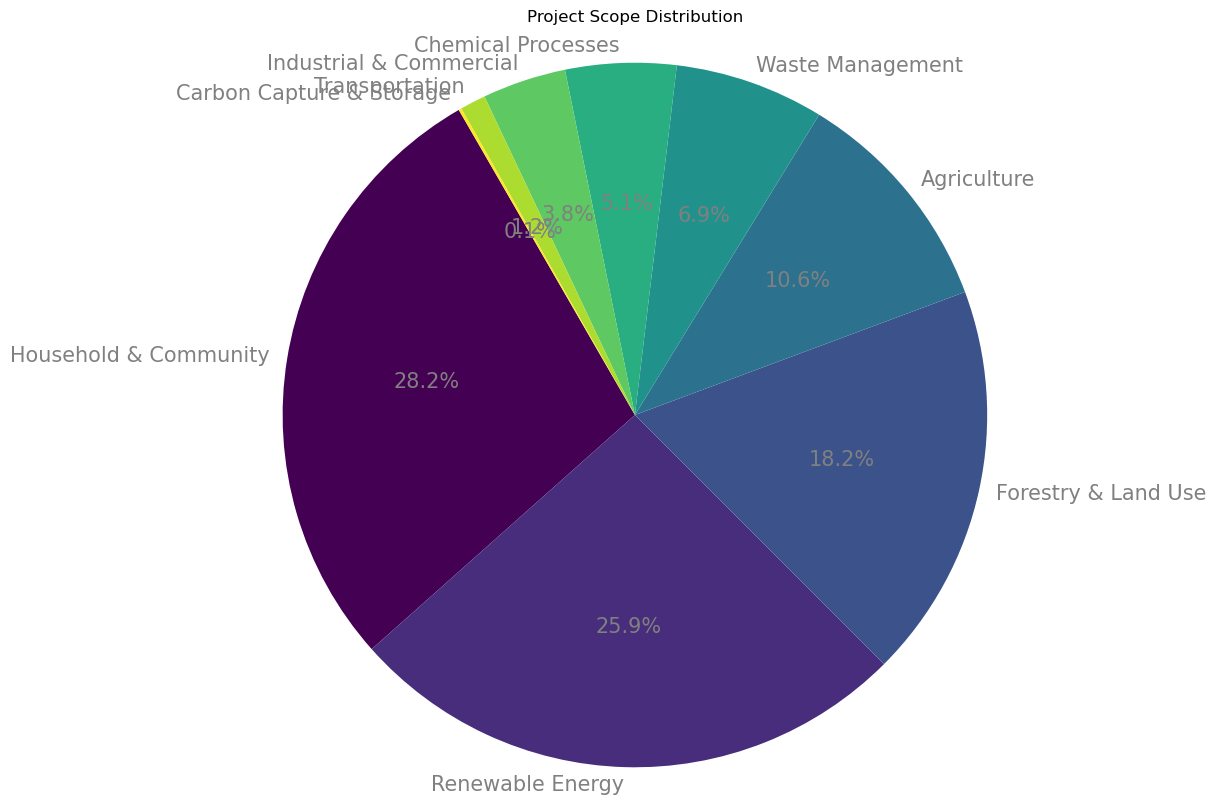

In [21]:

# Convert the Series to a DataFrame
df_scope_counts = scope_counts.reset_index()
df_scope_counts.columns = ['scope', 'count']

df_scope_counts.set_index('scope', inplace=True)

# Plotting the pie chart
plt.figure(figsize=(10, 10))

pie = df_scope_counts['count'].plot.pie(
    autopct='%1.1f%%', 
    startangle=120, 
    cmap='viridis',  
    title='Project Scope Distribution', 
    labeldistance=1.05,
    textprops={'color': "grey", 'fontsize': 15}
)

plt.ylabel('')  # Remove y-axis label
# Increase label font size
plt.rcParams['font.size'] = 15.0
# Ensuring the pie is a circle
plt.axis('equal')

# Display the chart
plt.show()

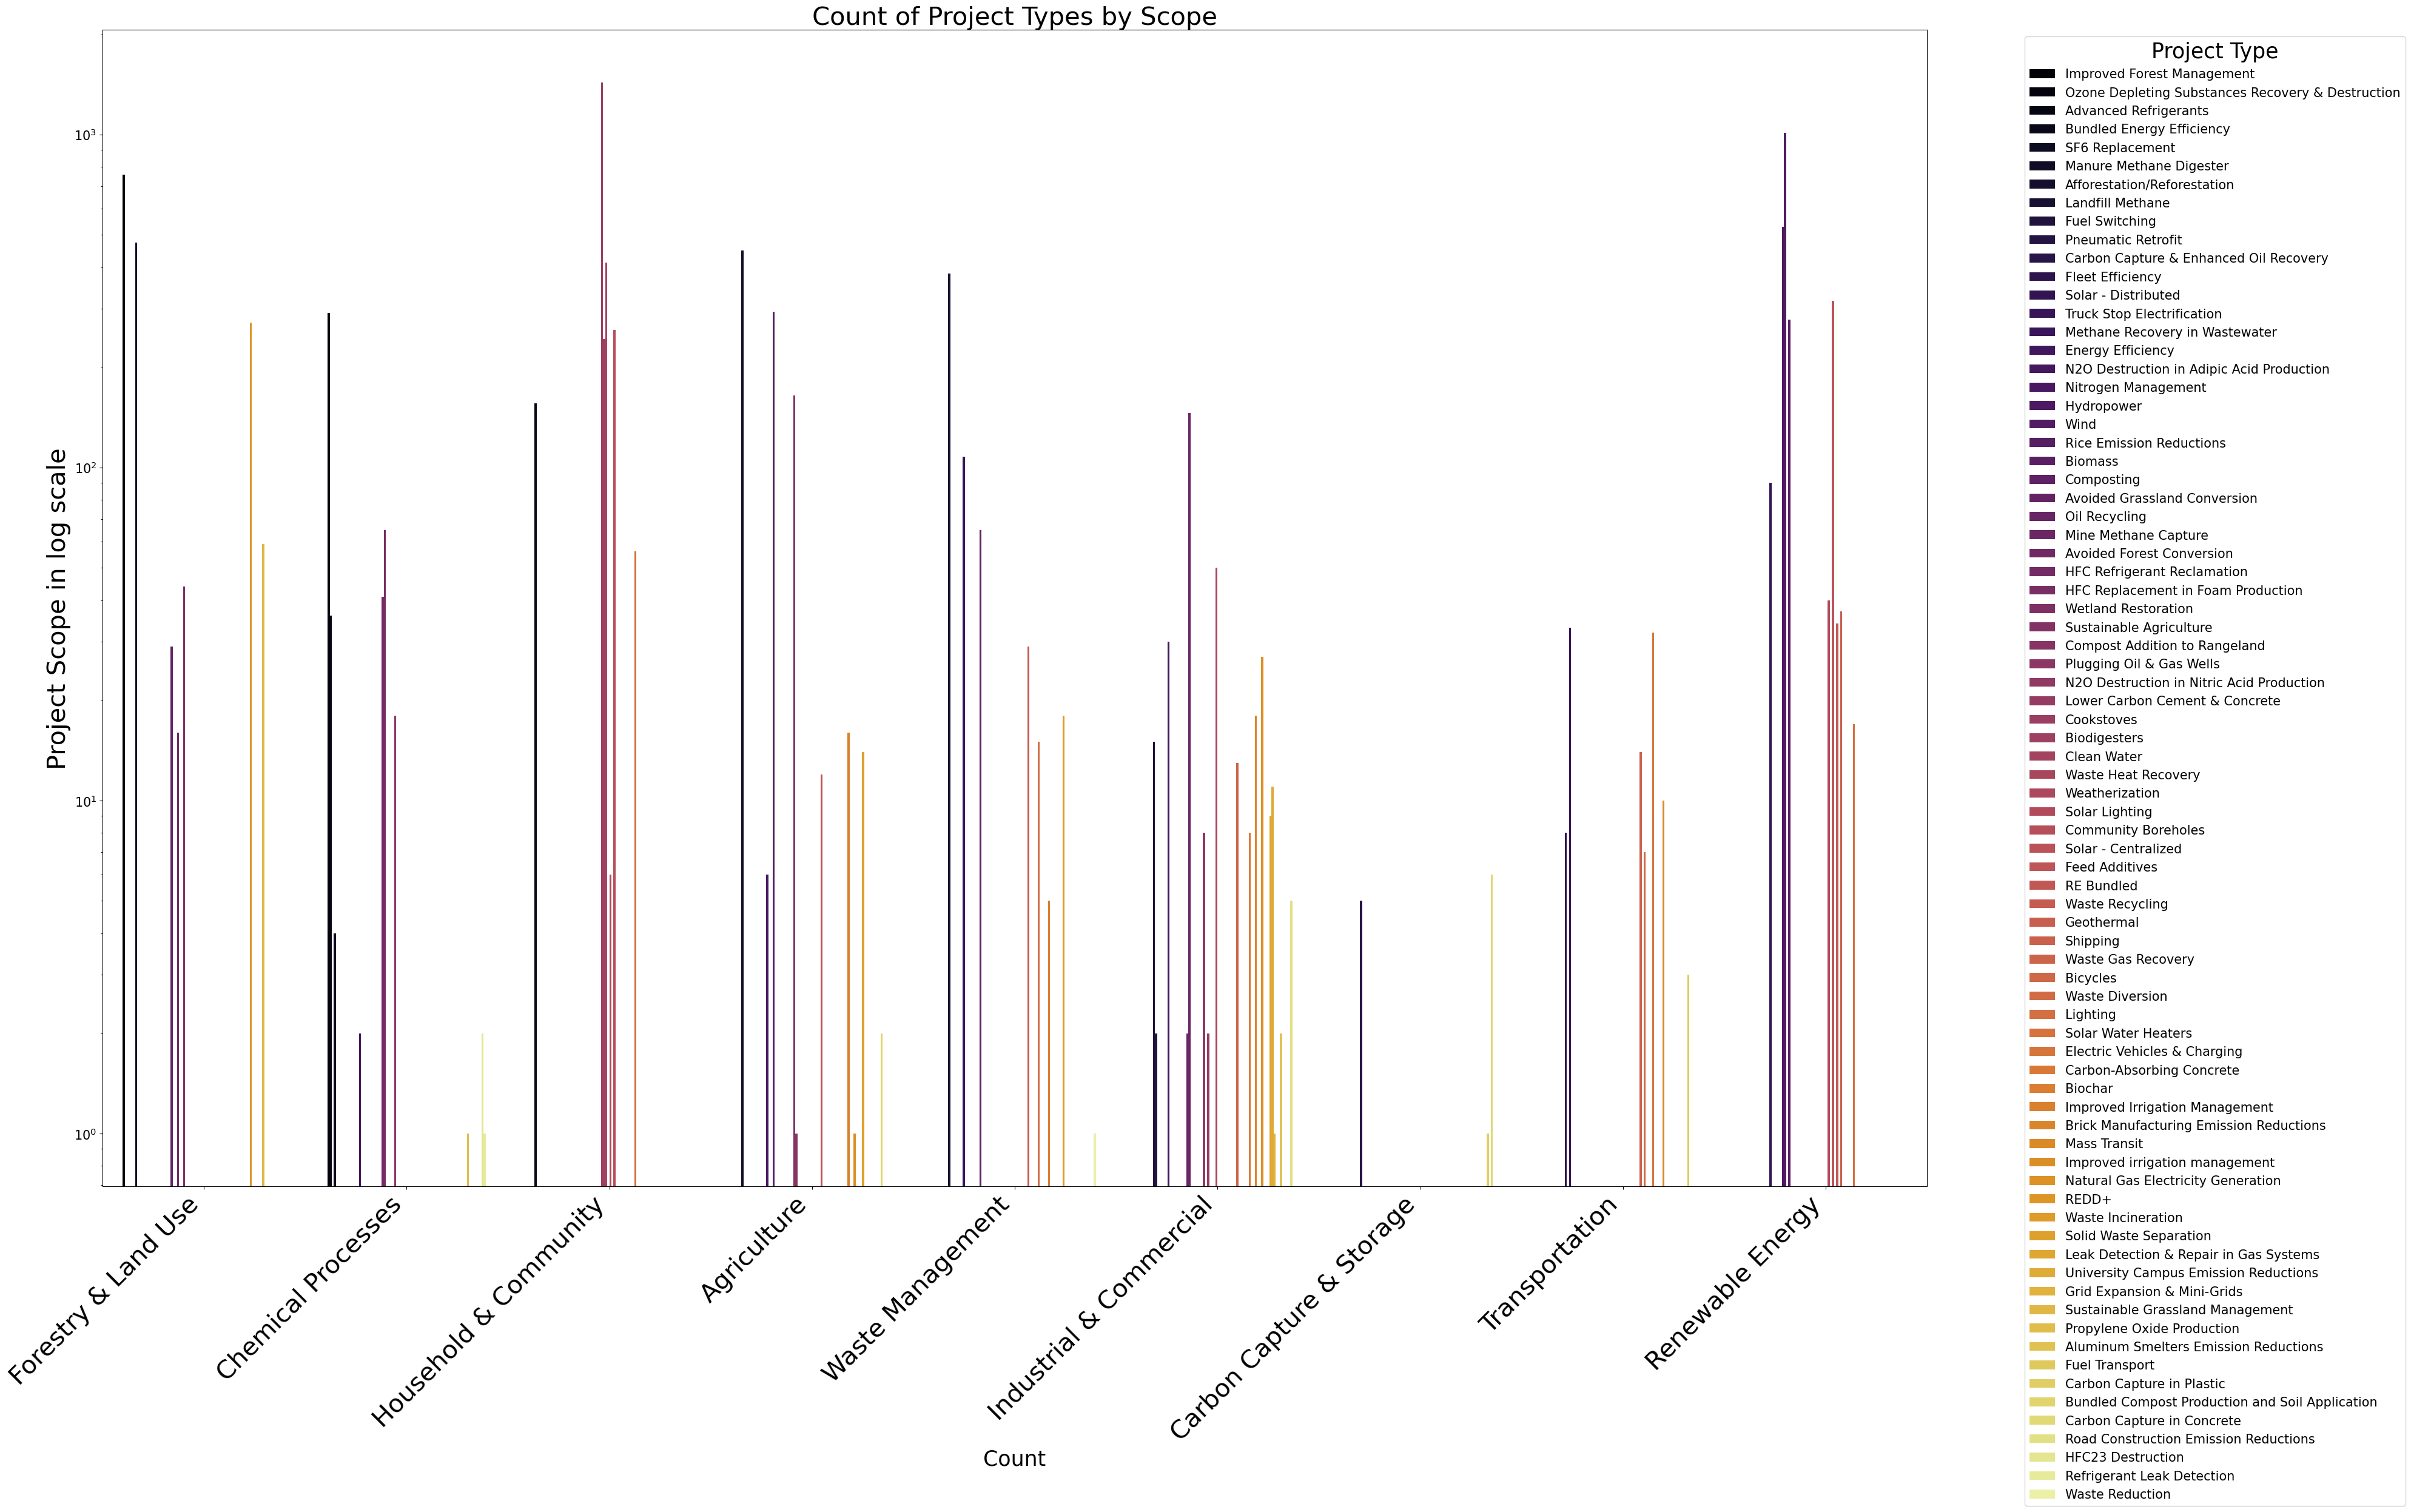

In [22]:
# Create a bar plot
plt.figure(figsize=(40, 25))
sns.countplot(data=projects_df, x='scope', hue='type', palette='inferno',linewidth=5)
plt.title('Count of Project Types by Scope', fontsize=30)
plt.ylabel('Project Scope in log scale', fontsize=30)
plt.yscale('log')
plt.xlabel('Count',fontsize=25)
plt.xticks(fontsize=30, rotation = 45, ha= "right")
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='25')
plt.tight_layout()
plt.show()

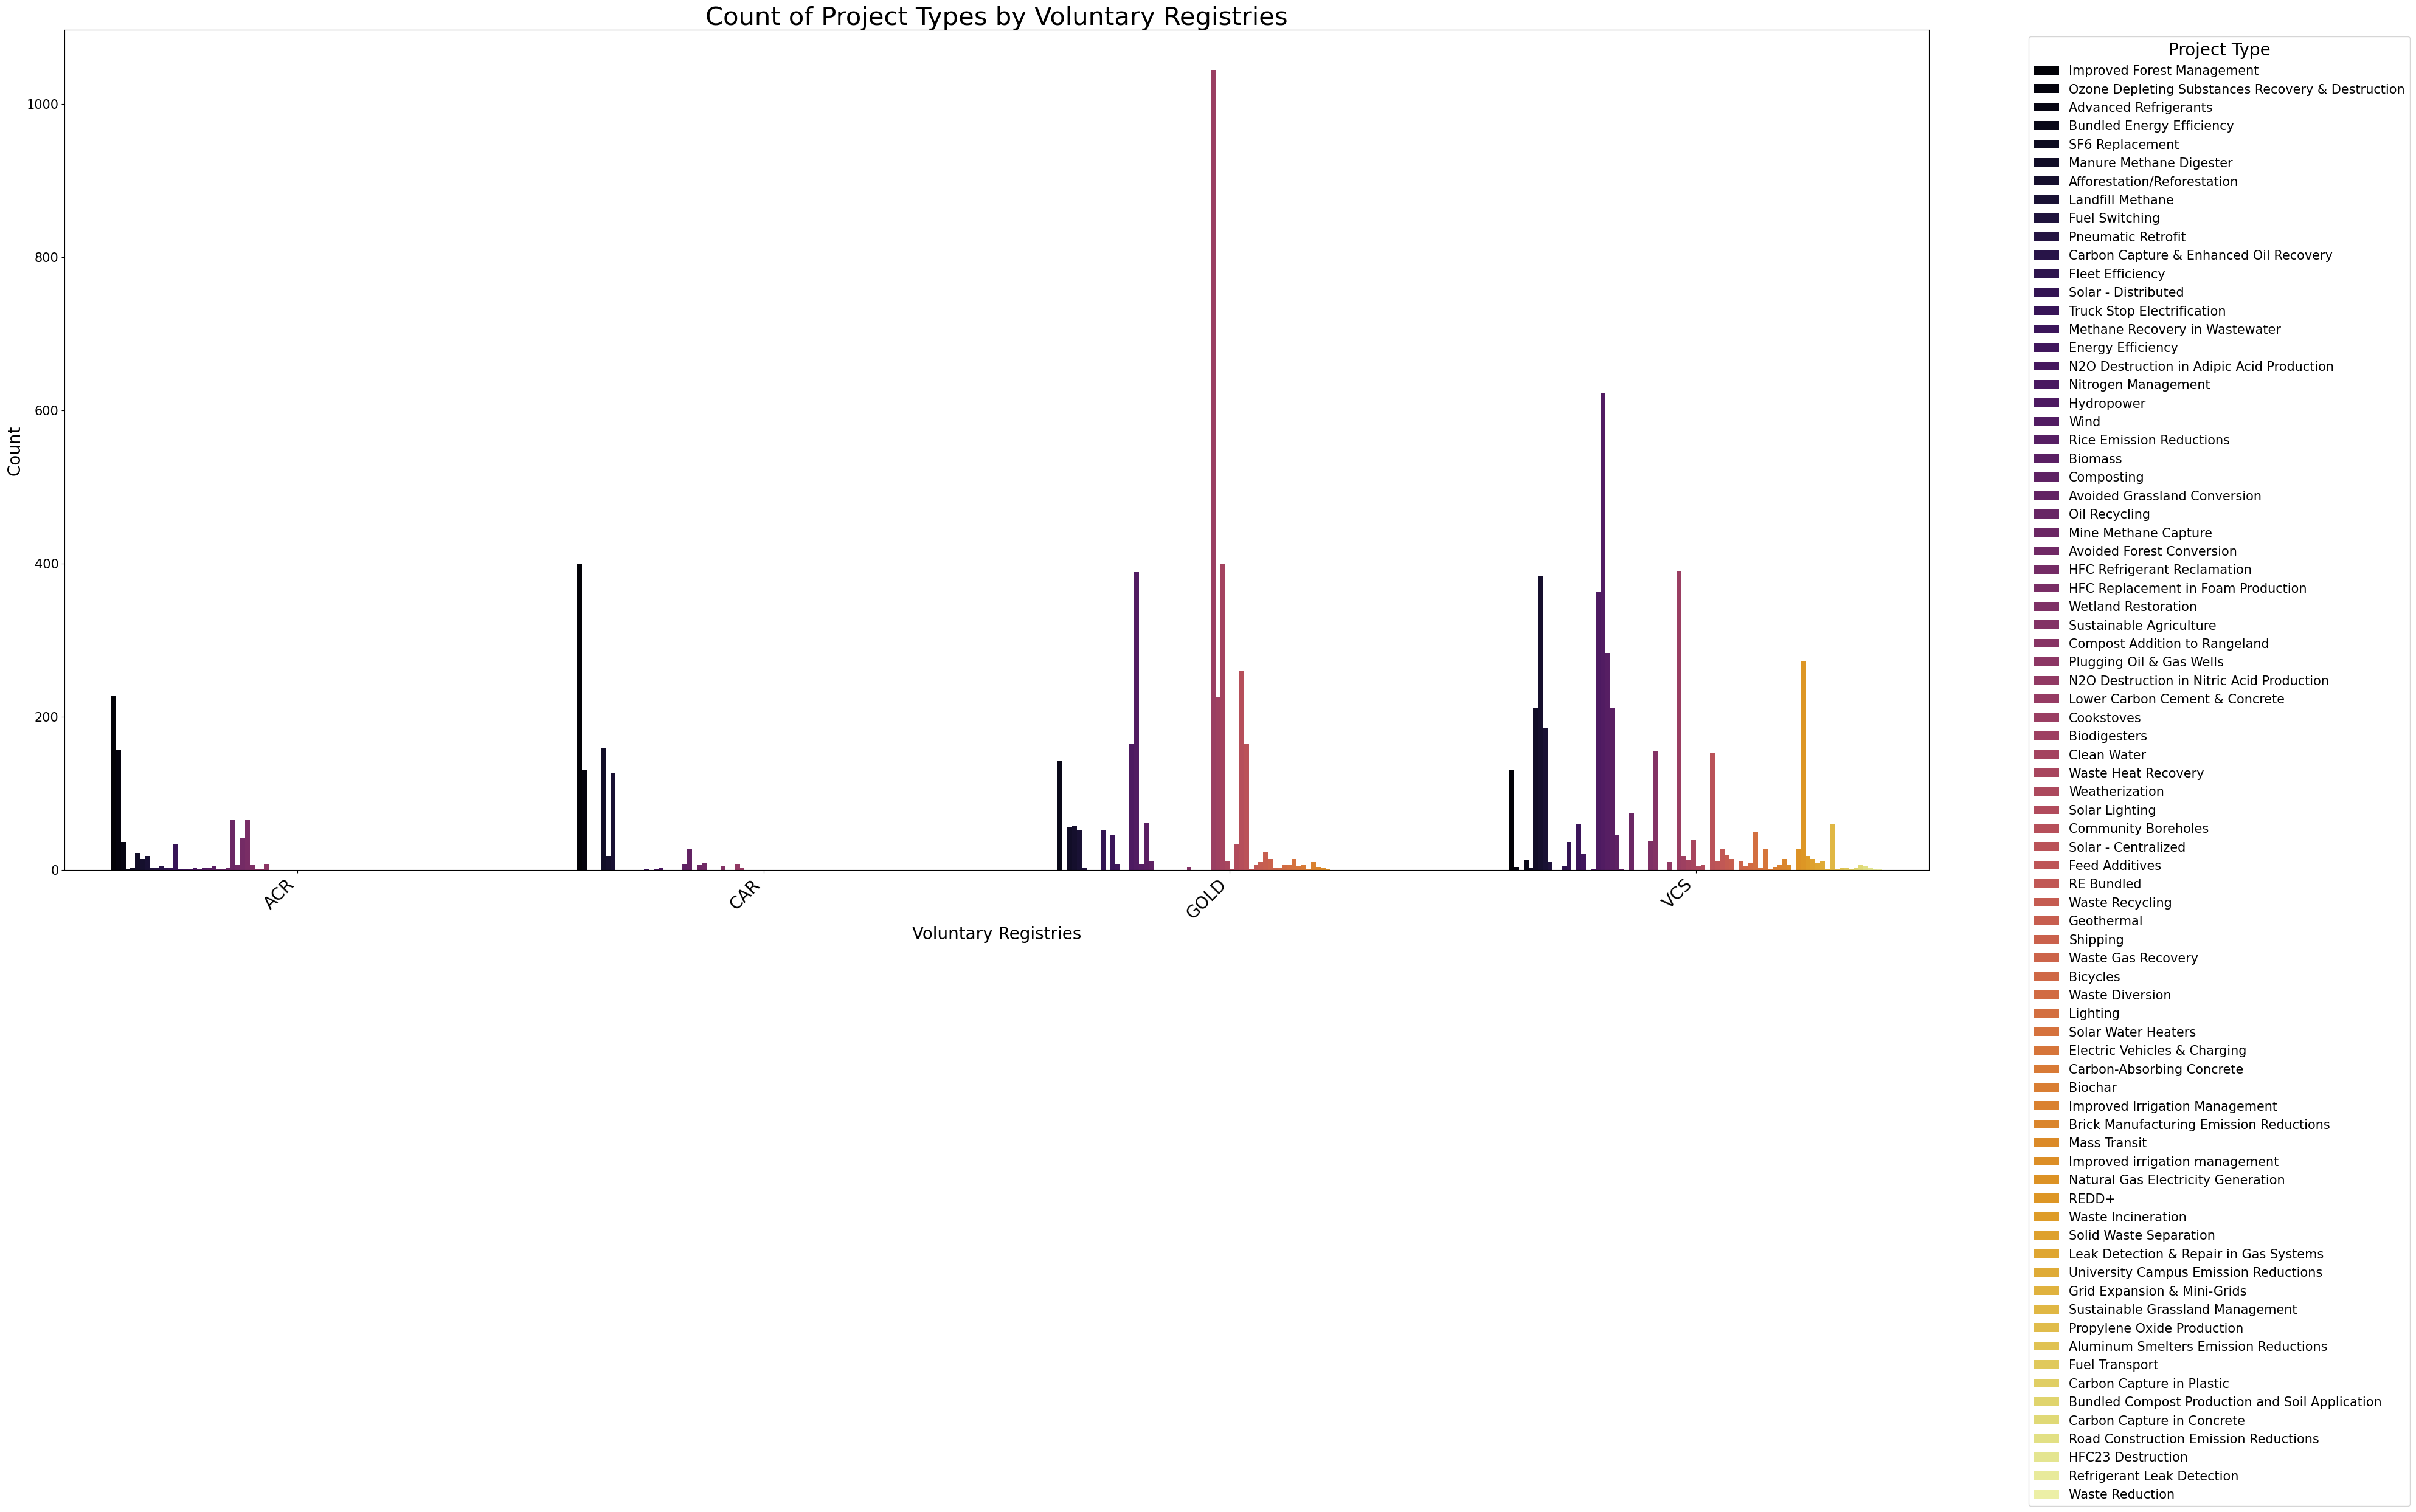

In [23]:
# Create a bar plot
plt.figure(figsize=(40, 22))
sns.countplot(data=projects_df, x='voluntary_registry', hue='type', palette='inferno')
plt.title('Count of Project Types by Voluntary Registries',fontsize=30)
plt.xlabel('Voluntary Registries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=20)
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize='20')
plt.tight_layout()
plt.show()

In [24]:
# Keeping only the features of interest
features_of_interest = projects_df.columns

In [25]:
project_df_wfoi = projects_df[features_of_interest]
project_df_wfoi.head()

,project_id,project_name,voluntary_registry,arborwaproject,voluntary_status,scope,type,reduction_or_removal,methodology_or_protocol,region,country,state,project_site_location,project_developer,total_credits_issued,total_credits_retired,total_credits_remaining,total_buffer_pool_deposits,reversals_covered_by_buffer_pool,reversals_not_covered_by_buffer,first_year_of_project_(vintage),year_unknown,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,pers,registry_or_arb_or_wa,arb_project_detail,arb_id,poa_idoraggregate_id,corsia_eligible,project_listed,project_registered,ccb_or_certifications,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_berkeley_carbon_trading_project,added_to_database_version_-_with_data_through,unnamed:_158,"1st_issuance_yr_(no_hard_code,_hide)",unnamed:_160
0,ACR1002,Doyon Ts'oo,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,ALASKA,Southeast and Northwest Interior Alaska,"Doyon, Limited",0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.doyon.com/about/sustainability/carbon-fore...,,,v11 03-2024,NaN,0.0,1.0
1,ACR1006,Challenge Tree Farm IFM Project,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,CALIFORNIA,Yuba and Butte County,1169,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,,v11 03-2024,NaN,0.0,1.0
2,ACR1007,A-Gas 3-2023B,ACR,No,NaN,Chemical Processes,Ozone Depleting Substances Recovery & Destruction,Reduction,ARB Compliance Offset Protocol: Destruction of...,North America,United States,OHIO,Bowling Green,A-Gas US Inc.,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Dillon Consulting Limited,NaN,NaN,ACR,Listed - Proposed Project,CAOD1007,NaN,NaN,NaN,NaN,NaN,Ozone Depleting Substances,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.agasamericas.com,,,v11 03-2024,NaN,0.0,1.0
3,ACR1008,Advanced Refrigeration - ARS2022004,ACR,No,Listed,Chemical Processes,Advanced Refrigerants,Reduction,Advanced Refrigeration Systems,North America,United States,MISSOURI,"1181 Gannon plaza, Festus, MO",Therm Solutions Inc.,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"First Environment, Inc.",NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Process Emissions,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,,v11 03-2024,NaN,0.0,1.0
4,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,Mali,Niono District,Niono,Katene Kadji,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Fuel Switching,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,NaN,v 1 12-2020,NaN,0.0,1.0


In [26]:
project_df_wfoi.shape

(9087, 45)

In [27]:
null_counts = project_df_wfoi.isnull().sum()
null_counts

project_id                                          0
project_name                                        0
voluntary_registry                                  0
arborwaproject                                      0
voluntary_status                                  323
scope                                               0
type                                                0
reduction_or_removal                                0
methodology_or_protocol                           271
region                                              0
country                                             0
state                                            7405
project_site_location                            7443
project_developer                                   0
total_credits_issued                                0
total_credits_retired                               0
total_credits_remaining                             0
total_buffer_pool_deposits                          0
reversals_covered_by_buffer_

In [28]:
# Columns to fill with ''
object_columns = project_df_wfoi.select_dtypes(include='object').columns
fill_value_object = {col: ' ' for col in object_columns}

# Fill NaNs
project_df_wfoi = project_df_wfoi.fillna(fill_value_object)
final_count = project_df_wfoi.isnull().sum()
final_count

project_id                                          0
project_name                                        0
voluntary_registry                                  0
arborwaproject                                      0
voluntary_status                                    0
scope                                               0
type                                                0
reduction_or_removal                                0
methodology_or_protocol                             0
region                                              0
country                                             0
state                                               0
project_site_location                               0
project_developer                                   0
total_credits_issued                                0
total_credits_retired                               0
total_credits_remaining                             0
total_buffer_pool_deposits                          0
reversals_covered_by_buffer_

In [29]:
# Translate the project_name to english

In [30]:
#pip install langdetect

In [31]:
#pip install translate

In [32]:
#pip install googletrans==4.0.0-rc1

In [33]:
'''
from translate import Translator
from langdetect import detect
import time

# Initialize the translator
translator = Translator(to_lang="en")

# Function to detect language and translate project names
def translate_name(name):
    try:
        # Detect the language of the project name
        lang = detect(name)
        # If the detected language is not English, translate it
        if lang != 'en':
            translated = translator.translate(name, dest='en')
            return translated.text
        else:
            # If the language is English, return the original name
            return name
    except Exception as e:
        print(f"Error translating '{name}': {e}")
        return name

# Apply the translation function to the project_name column with retry logic
def translate_with_retry(name, retries=3):
    for i in range(retries):
        try:
            return translate_name(name)
        except Exception as e:
            print(f"Retry {i+1}/{retries} for '{name}' failed with error: {e}")
            time.sleep(1)  # wait for a second before retrying
    return name  # return the original name if all retries fail

# Apply the translation function to the project_name column
# project_df_wfoi['project_name_english'] = project_df_wfoi['project_name'].apply(translate_name)

# Save the translated dataset
# project_df_wfoi.to_csv('../data/translated_dataset.csv', index=False)
'''

'\nfrom translate import Translator\nfrom langdetect import detect\nimport time\n\n# Initialize the translator\ntranslator = Translator(to_lang="en")\n\n# Function to detect language and translate project names\ndef translate_name(name):\n    try:\n        # Detect the language of the project name\n        lang = detect(name)\n        # If the detected language is not English, translate it\n        if lang != \'en\':\n            translated = translator.translate(name, dest=\'en\')\n            return translated.text\n        else:\n            # If the language is English, return the original name\n            return name\n    except Exception as e:\n        print(f"Error translating \'{name}\': {e}")\n        return name\n\n# Apply the translation function to the project_name column with retry logic\ndef translate_with_retry(name, retries=3):\n    for i in range(retries):\n        try:\n            return translate_name(name)\n        except Exception as e:\n            print(f"Retry

## Data Split

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(project_df_wfoi, test_size=0.2, random_state=42)

In [35]:
#print shape of the split dataset
print(train_df.shape, test_df.shape)

(7269, 45) (1818, 45)


In [36]:
# Checkpoint 
# Save the DataFrames as CSV files
train_df.to_csv('../data/train_dataset.csv', index=False)
test_df.to_csv('../data/test_dataset.csv', index=False)